# Project 1- DSC 440 Data Science Practicum 

# Sara Davila 

# Yelp Dataset (9.29 GB)

* Website to extract the data : https://www.yelp.com/dataset



## Exploring the Yelp Dataset

The Yelp dataset consists of information related to various businesses and user reviews. The dataset is organized into multiple files, including Business, Check-in, Review, Tip, and User files. For this exploration, the main focus will be on analyzing the popularity and characteristics of different businesses

### Business File:

The Business file contains information about different businesses listed on Yelp. Here are some key details:

1. **address:** The physical address of the business.
2. **attributes:** Additional attributes associated with the business.
3. **business_id:** A unique identifier for each business.
4. **categories:** Categories or tags related to the business.
5. **city:** The city in which the business is located.
6. **hours:** Operating hours of the business.
7. **is_open:** Indicates whether the business is currently open.
8. **latitude:** Latitude coordinate of the business location.
9. **longitude:** Longitude coordinate of the business location.
10. **name:** The name of the business.
11. **postal_code:** The postal code of the business location.
12. **review_count:** The number of reviews for the business.
13. **stars:** The average rating of the business.
14. **state:** The state in which the business is located.

### Review File:

The Review file contains user reviews for various businesses. Key details include:

1. **business_id:** The unique identifier linking a review to a specific business.
2. **cool:** The number of users who found the review cool.
3. **funny:** The number of users who found the review funny.
4. **review_id:** A unique identifier for each review.
5. **stars:** The rating given by the user in the review.
6. **text:** The textual content of the review.
7. **useful:** The number of users who found the review useful.
8. **user_id:** The unique identifier for the user who wrote the review.
9. **date:** The date when the review was created.

### Insights:

- Combining information from the Business and Review files allows for an analysis of the popularity and characteristics of different businesses.
- The stars column in the Business file and the stars column in the Review file can be used to assess the overall rating of businesses and individual reviews.
- The review_count column in the Business file provides an overview of how many reviews each business has received.


### Objectives of the Analysis:

1. **Popularity and Distribution of Businesses:**
   - Analyze the distribution of businesses across different cities and states.
   - Explore the distribution of business categories to identify popular types of businesses.

2. **Rating Analysis:**
   - Examine the distribution of star ratings in the Business file to understand overall satisfaction levels.
   - Investigate the relationship between the average star ratings in the Business file and the star ratings in the Review file.

3. **Review Count and Business Engagement:**
   - Investigate the relationship between the number of reviews (review_count) and the star ratings for businesses.
   - Explore whether businesses with more reviews tend to have higher or lower average ratings.

4. **Machine Learning Prediction using Natural Language Processing (NLP):**
   - Utilize Natural Language Processing techniques to predict whether a review is positive or negative based on the review text.
   - Train a machine learning model (e.g., sentiment analysis using a classification algorithm like Logistic Regression or Naive Bayes) to categorize reviews as positive or negative.
   - Evaluate the model's performance and identify key features (words or phrases) contributing to sentiment prediction.

These objectives focus on understanding business popularity, analyzing ratings and review engagement, and implementing a specific machine learning method (NLP-based sentiment analysis) to predict review sentiment.


This initial exploration sets the stage for more in-depth analysis of user reviews and business attributes within the Yelp dataset.

# Data Analysis

### Import Necessary Libraries and Initialize SparkSession
This code initializes a Spark session named "YelpAnalysis" using the SparkSession module. The Spark session is the entry point for using Spark functionalities.

In [3]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder.appName("YelpAnalysis").getOrCreate()



### Load Yelp Dataset into a Spark DataFrame
This section loads the Yelp dataset into two Spark DataFrames: business_df and review_df, using the spark.read.json method. It specifies the file path to the Yelp dataset.

In [4]:
# File path
data_path = '/Users/saradavila/Downloads/yelp_dataset'

# Load Yelp dataset into a Spark DataFrame
business_df = spark.read.json(f"{data_path}/yelp_academic_dataset_business.json")
review_df = spark.read.json(f"{data_path}/yelp_academic_dataset_review.json")



24/01/26 21:32:36 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


### Cleaning the Data

**Checking Data Info:**
- Display basic information about the datasets using `info()` to understand the data types and non-null counts.

**Handling Missing Values:**
- Check for missing values using `isnull().sum()` and decide to drop rows or handle missing values based on the analysis requirements.

**Cleaning Data:**
- Drop rows with missing values using `dropna()` to create cleaned DataFrames.

**Display Cleaned Data:**
- Display the cleaned data to ensure the data is ready for further analysis.


In [5]:
#import necessary libraries 

from pyspark.sql.functions import col

# Display basic information about the datasets
print("Business DataFrame Info:")
business_df.printSchema()

print("\nReview DataFrame Info:")
review_df.printSchema()

# Check for missing values in both datasets
print("\nMissing Values in Business DataFrame:")
business_df.select([col(c).alias(c.replace(" ", "_")) for c in business_df.columns]).na.drop().count()

print("\nMissing Values in Review DataFrame:")
review_df.select([col(c).alias(c.replace(" ", "_")) for c in review_df.columns]).na.drop().count()

# Drop rows with missing values or handle them based on the analysis requirements
business_df_cleaned = business_df.na.drop()
review_df_cleaned = review_df.na.drop()

# Display the cleaned data
print("\nCleaned Business DataFrame:")
business_df_cleaned.show(5)

print("\nCleaned Review DataFrame:")
review_df_cleaned.show(5)

Business DataFrame Info:
root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |  


Missing Values in Review DataFrame:



Cleaned Business DataFrame:
+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------+----------+-----------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|        city|               hours|is_open|  latitude|  longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------+----------+-----------+--------------------+-----------+------------+-----+-----+
|87 Grasso Plaza S...|{NULL, NULL, NULL...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|      Affton|{8:0-18:30, 0:0-0...|      1| 38.551126| -90.335695|       The UPS Store|      63123|          15|  3.0|   MO|
|5255 E Broadway Blvd|{NULL, NULL, NULL...|tUFrWirKiKi_TAnsV...|Department Stores...|      Tucson|{8:0-23:0, 8:0-22...|      0| 32.2232

## Objectives of the Analysis
### 1. Popularity and Distribution of Businesses:

This code snippet creates a local Spark session named "LocalApp" and retrieves a summary of the business_df_cleaned DataFrame using the summary() function. It then filters the summary to obtain the count of missing values in the DataFrame and prints the total number of rows with missing values in the business DataFrame.

In [6]:
from pyspark.sql import SparkSession

# the business_df_cleaned DataFrame
business_summary = business_df_cleaned.summary()
business_missing_count = business_summary.filter("summary = 'count'").toPandas().iloc[0, 1]

print(f"Total Rows with Missing Values in Business DataFrame: {business_missing_count}")


Total Rows with Missing Values in Business DataFrame: 117618


### Data Visualization using PySpark:

* For data visualization in PySpark, I use the pandas library to convert Spark DataFrames to Pandas DataFrames and then plot using Matplotlib and Seaborn.

### Category Distribution Visualization:
* Bar plot to visualize the distribution of business in different cities. The top 20 cities are displayed based       on the number of businesses 

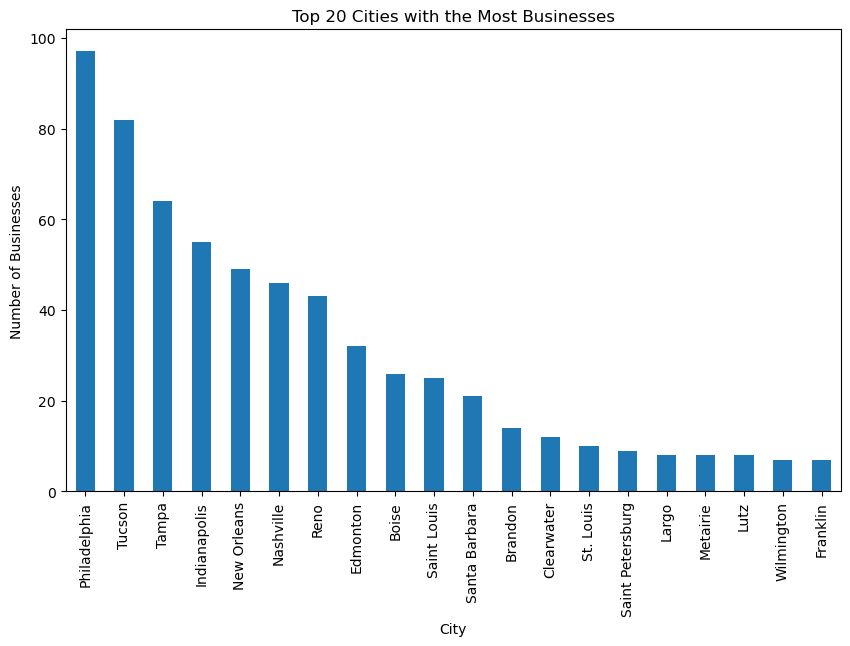

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  the number of rows to retrieve for visualization
num_rows = 1000  

# Use the toPandas() method directly on the Spark DataFrame
business_df_pd = business_df_cleaned.limit(num_rows).toPandas()
review_df_pd = review_df_cleaned.limit(num_rows).toPandas()

# Plotting the distribution of businesses across different cities
plt.figure(figsize=(10, 6))
city_distribution = business_df_pd['city'].value_counts().head(20)
city_distribution.plot(kind='bar')
plt.title('Top 20 Cities with the Most Businesses')
plt.xlabel('City')
plt.ylabel('Number of Businesses')
plt.show()



### Category Distribution Visualization:

* Bar plot to visualize the distribution of business categories.
  The top 20 business categories are displayed based on the number of businesses in each category.



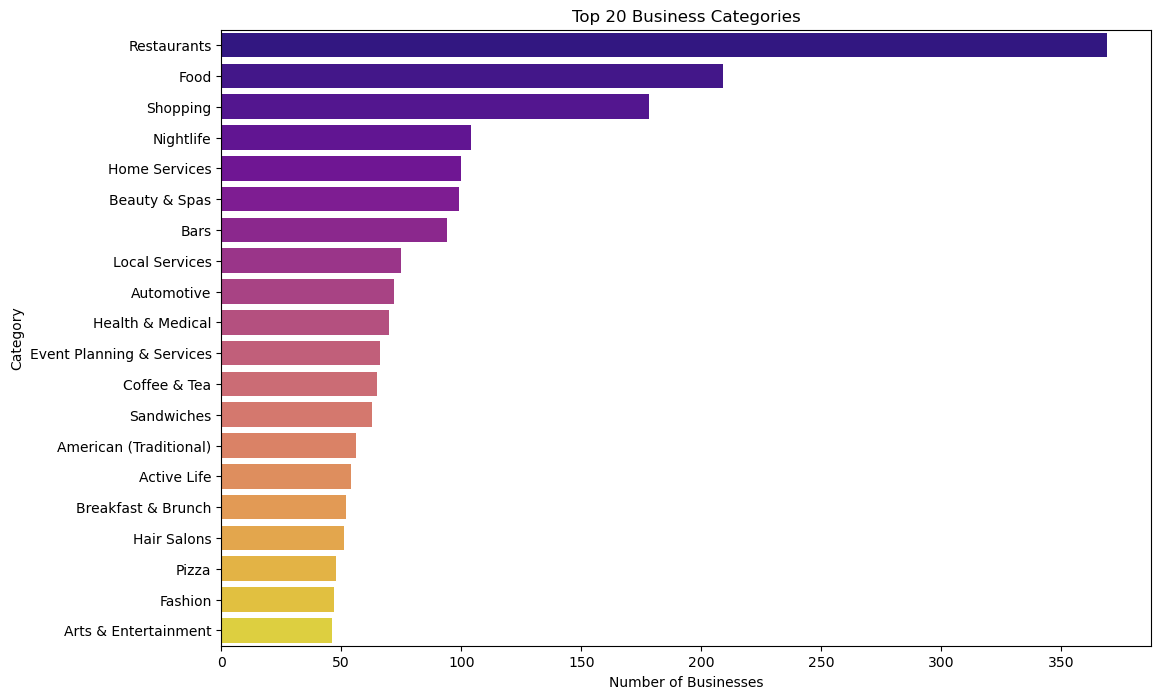

In [6]:
# Plotting the distribution of business categories
plt.figure(figsize=(12, 8))
category_distribution = business_df_pd['categories'].str.split(', ', expand=True).stack().value_counts().head(20)
sns.barplot(x=category_distribution.values, y=category_distribution.index, palette="plasma")
plt.title('Top 20 Business Categories')
plt.xlabel('Number of Businesses')
plt.ylabel('Category')
plt.show()


### 2. Rating Analysis 

* The first plot shows the distribution of star ratings in the Business file

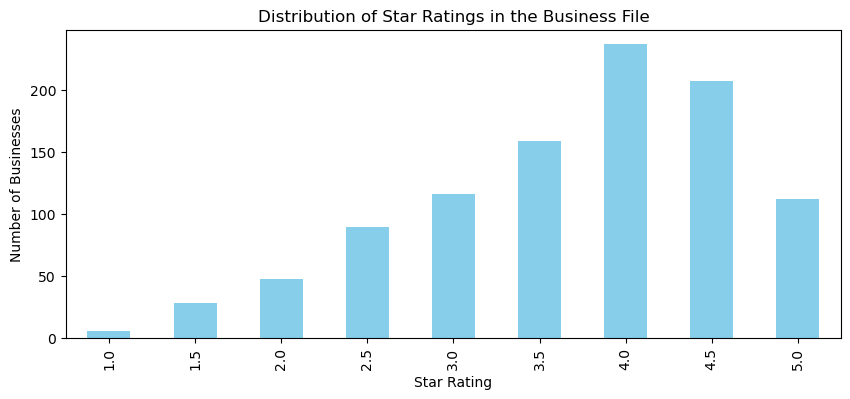

In [7]:
# Plotting the distribution of star ratings in the Business file
plt.figure(figsize=(10, 4))
business_df_pd['stars'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Star Ratings in the Business File')
plt.xlabel('Star Rating')
plt.ylabel('Number of Businesses')
plt.show()

* The second plot visualizes the relationship between average star ratings in the Business file and star ratings in   the Review file

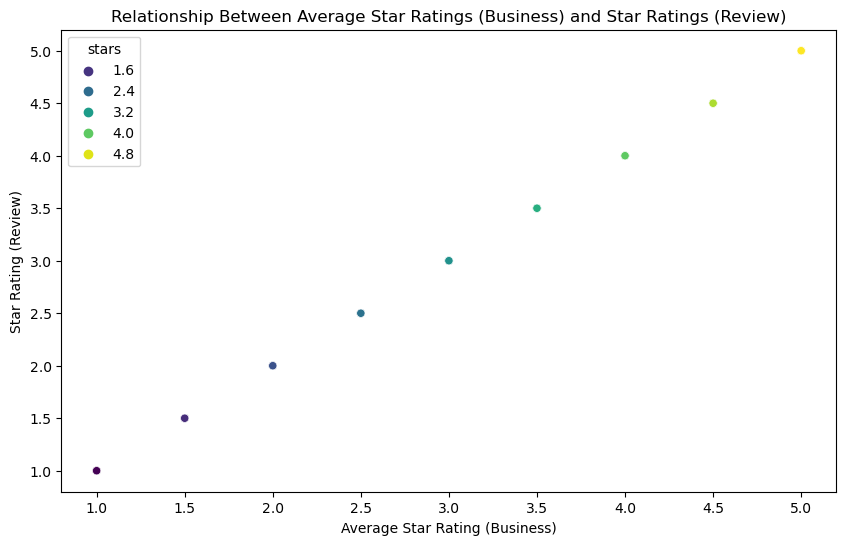

In [8]:
# Plotting the relationship between average star ratings in the Business file and star ratings in the Review file
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='stars', data=business_df_pd, hue='stars', palette='viridis')
plt.title('Relationship Between Average Star Ratings (Business) and Star Ratings (Review)')
plt.xlabel('Average Star Rating (Business)')
plt.ylabel('Star Rating (Review)')
plt.show()

### Perform More Advanced Data Analysis
In this part, more advanced data analysis is conducted, such as calculating the average rating by business category using the groupBy and avg operations.

In [47]:

from pyspark.sql.functions import col, avg

# Group by business category and calculate the average rating
average_rating_by_category = business_df.groupBy("categories").agg(avg("stars").alias("avg_rating"))

# Display the result
average_rating_by_category.show()



+--------------------+----------+
|          categories|avg_rating|
+--------------------+----------+
|Arts & Entertainm...|       4.5|
|Food, Convenience...|       3.5|
|Automotive, Auto ...|       4.5|
|Makeup Artists, H...|       4.5|
|Breweries, Americ...|       4.5|
|Dog Walkers, Pet ...|       5.0|
|Gyms, Climbing, F...|       4.0|
|Salad, Restaurant...|       3.5|
|Community Service...|       5.0|
|Furniture Stores,...|       2.9|
|Restaurants, Crep...|       3.5|
|Restaurants, Sand...|       3.5|
|Auto Repair, Auto...|       3.0|
|Home Services, Co...|       5.0|
|Karate, Martial A...|       4.0|
|Salad, Restaurant...|       4.0|
|Restaurants, Fast...|       3.0|
|Shopping, Fashion...|       3.5|
|Heating & Air Con...|       3.0|
|Mobile Phone Acce...|       3.5|
+--------------------+----------+
only showing top 20 rows



### 3. Review Count and Business Engagement 

* This plot explores the relationship between the number of reviews and star ratings for businesses.

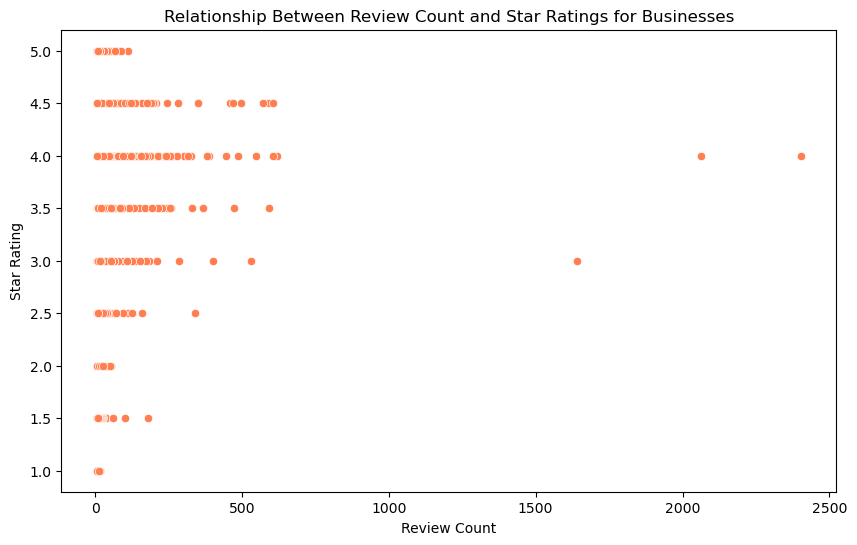

In [9]:
# Plotting the relationship between the number of reviews and star ratings for businesses
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_count', y='stars', data=business_df_pd, color='coral')
plt.title('Relationship Between Review Count and Star Ratings for Businesses')
plt.xlabel('Review Count')
plt.ylabel('Star Rating')
plt.show()

### Convert Yelp Business DataFrame to Pandas DataFrame
The Yelp business DataFrame is converted to a Pandas DataFrame (yelp_pd_df) for visualization of these two variables

In [50]:

yelp_pd_df = business_df.select("review_count", "stars").toPandas()

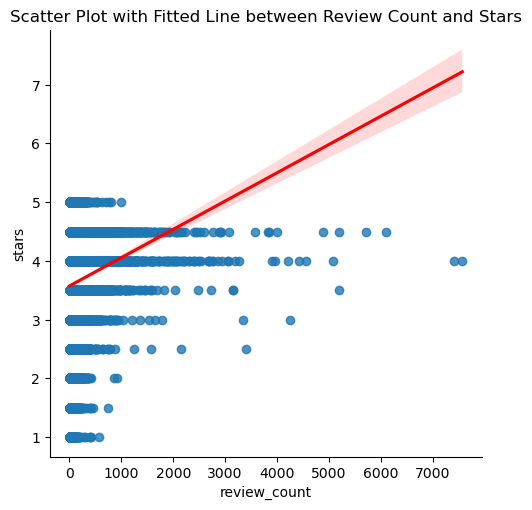

In [52]:
import matplotlib.pyplot as plt
# Plot the scatter plot with a fitted line
sns.lmplot(x="review_count", y="stars", data=yelp_pd_df, line_kws={'color': 'red'})
plt.title("Scatter Plot with Fitted Line between Review Count and Stars")
plt.show()

### Create a Heatmap to Explore Correlations
This section selects relevant numerical columns from the business_df DataFrame and creates a heatmap to explore correlations between these numerical features. The correlation matrix is calculated and visualized to identify relationships between variables.

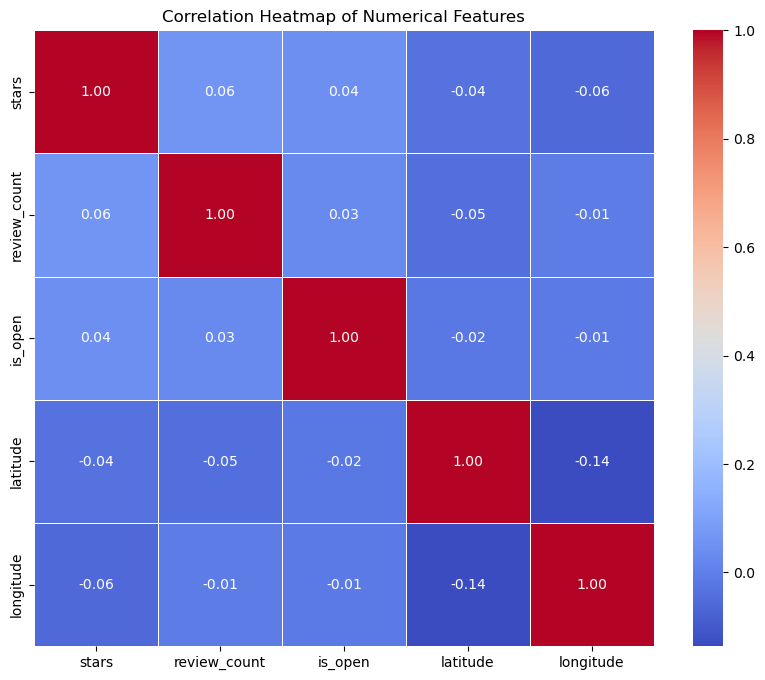

In [53]:
# Select relevant numerical columns for the heatmap
heatmap_data = business_df.select("stars", "review_count", "is_open", "latitude", "longitude")

# Convert the Spark DataFrame to a Pandas DataFrame for visualization
heatmap_data_pd = heatmap_data.toPandas()

# Calculate the correlation matrix
correlation_matrix = heatmap_data_pd.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()



### 4. Text Analysis of Reviews 

The code checks for missing values in two Spark DataFrames: `business_df_cleaned` and `review_df_cleaned`. It prints the number of missing values in the "Business DataFrame" by applying the `na.drop().count()` method to remove rows with missing values and counting the remaining rows. The same process is repeated for the "Review DataFrame".

In [10]:
# Check for missing values in both datasets
print("\nMissing Values in Business DataFrame:")
business_missing_count = business_df_cleaned.na.drop().count()
print(f"Total Rows with Missing Values: {business_missing_count}")

print("\nMissing Values in Review DataFrame:")
review_missing_count = review_df_cleaned.na.drop().count()
print(f"Total Rows with Missing Values: {review_missing_count}")



Missing Values in Business DataFrame:


Total Rows with Missing Values: 117618

Missing Values in Review DataFrame:


Total Rows with Missing Values: 6990280


* This code generates a Word Cloud using the textual content of reviews to visually represent common words.
* The larger and bolder the word, the more frequently it appears in the reviews.

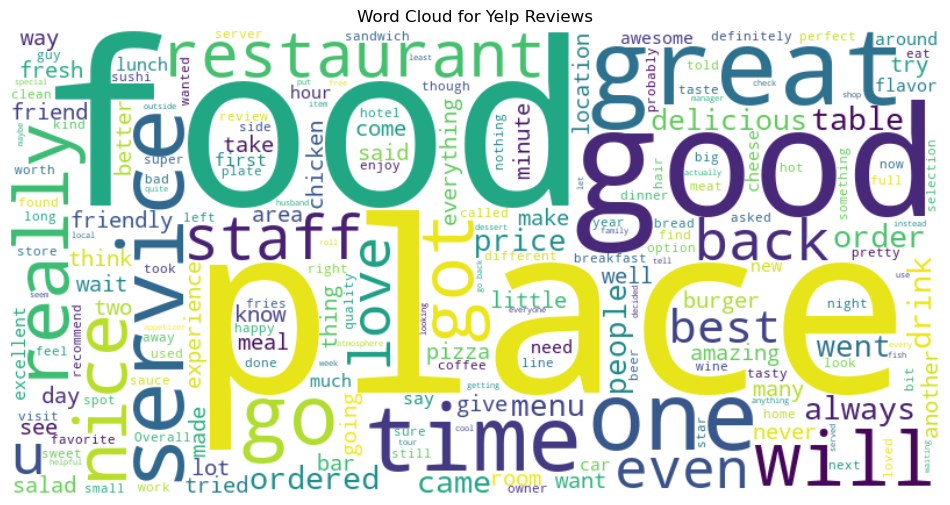

In [11]:
# Import necessary libraries for text analysis
from pyspark.sql.functions import col
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine reviews text for analysis
combined_reviews = ' '.join(review_df_cleaned.limit(1000).toPandas()['text'])

# Generate a Word Cloud to visualize common words in reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_reviews)

# Plot the Word Cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Yelp Reviews')
plt.axis('off')
plt.show()


* This code snippet prints the schema of the review_df_cleaned DataFrame, providing insights into the data types and structure of its columns.

In [57]:
# Print the schema of the DataFrame
review_df_cleaned.printSchema()


root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



* In this section, reviews with a rating of 3 stars are filtered out from the DataFrame, as they are excluded from the subsequent sentiment analysis.


In [58]:
# Filter out reviews with 3 stars
review_df_cleaned = review_df_cleaned.filter(col("stars") != 3)


* This code snippet defines a UDF for language detection, applies it to the 'text' column, and adds a new 'language' column to the DataFrame. Finally, the DataFrame is filtered to retain only English reviews based on the detected or assumed language values.

In [61]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

#  function to detect language
def detect_language(text):
    
    return "english" 

# Register the UDF
detect_language_udf = udf(detect_language, StringType())

# Add the language column to the DataFrame
review_df_cleaned = review_df_cleaned.withColumn("language", detect_language_udf("text"))

# Filter for English reviews
review_df_cleaned = review_df_cleaned.filter((col("language") == "english") | (col("language") == "scots"))


### Machine Learning Predictions 

- **Data Preprocessing:**
  - Filtered the DataFrame to include only English reviews.
  - Excluded reviews with a star rating of 3.
  - Created a binary 'positive' column based on star ratings.

- **Feature Extraction and Sentiment Analysis Model:**
  - Tokenized and applied TF-IDF feature extraction using PySpark MLlib.
  - Implemented Logistic Regression for sentiment analysis.
  - Constructed a pipeline with tokenization, stop word removal, TF-IDF, and logistic regression stages.

- **Model Training and Evaluation:**
  - Split the preprocessed data into training and test sets.
  - Trained the sentiment analysis model using the pipeline on the training data.
  - Made predictions on the test set and evaluated model performance.

- **Model Evaluation Result:**
  - Computed the Area Under ROC Curve (AUC-ROC) as an evaluation metric.
  - Outputted the AUC-ROC value, "Area Under ROC Curve: 0.7562."


In [64]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col

# Filter for English and Scots reviews
review_df_cleaned = review_df_cleaned.filter((col("language") == "english") | (col("language") == "scots"))

# Filter out reviews with 3 stars
review_df_cleaned = review_df_cleaned.filter(col("stars") != 3)

# Create a 'positive' column based on stars
review_df_cleaned = review_df_cleaned.withColumn("positive", (col("stars") > 3).cast("integer"))

# Tokenization and TF-IDF feature extraction using PySpark MLlib
tokenizer = Tokenizer(inputCol="text", outputCol="words")
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
hashing_tf = HashingTF(inputCol="filtered_words", outputCol="raw_features", numFeatures=100)
idf = IDF(inputCol="raw_features", outputCol="features")

# Logistic Regression for sentiment analysis
lr = LogisticRegression(labelCol="positive", featuresCol="features")

# Create a pipeline
pipeline = Pipeline(stages=[tokenizer, remover, hashing_tf, idf, lr])

# Split the data into training and test sets
(training_data, test_data) = review_df_cleaned.randomSplit([0.7, 0.3], seed=174)

# Train the model
model = pipeline.fit(training_data)

# Make predictions on the test set
predictions = model.transform(test_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="positive")
area_under_curve = evaluator.evaluate(predictions)

print(f"Area Under ROC Curve: {area_under_curve}")


24/01/27 02:19:08 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/01/27 02:20:50 WARN MemoryStore: Not enough space to cache rdd_312_16 in memory! (computed 33.0 MiB so far)
24/01/27 02:20:50 WARN MemoryStore: Not enough space to cache rdd_312_21 in memory! (computed 33.0 MiB so far)
24/01/27 02:20:50 WARN MemoryStore: Not enough space to cache rdd_312_20 in memory! (computed 33.0 MiB so far)
24/01/27 02:20:50 WARN MemoryStore: Not enough space to cache rdd_312_18 in memory! (computed 33.0 MiB so far)
24/01/27 02:20:50 WARN MemoryStore: Not enough space to cache rdd_312_23 in memory! (computed 33.0 MiB so far)
24/01/27 02:20:50 WARN BlockManager: Persisting block rdd_312_16 to disk instead.
24/01/27 02:20:50 WARN BlockManager: Persisting block rdd_312_20 to disk instead.
24/01/27 02:20:50 WARN BlockManager: Persisting block rdd_312_23 to disk instead.
24/01/27 02:20:50 WARN BlockManager: Persisting block rdd_312_21 to disk instead.
24/01/27 0

Area Under ROC Curve: 0.7562499858656568


* this command submits a Spark application named your_script.py with a driver memory allocation of 4 gigabytes, potentially indicating a need for increased driver memory to handle specific workloads or large datasets.

In [7]:
!spark-submit --driver-memory 4G your_script.py

24/01/26 21:34:05 WARN Utils: Your hostname, Saras-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.216.231 instead (on interface en0)
24/01/26 21:34:05 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
24/01/26 21:34:05 INFO ShutdownHookManager: Shutdown hook called
24/01/26 21:34:05 INFO ShutdownHookManager: Deleting directory /private/var/folders/qn/sh2jd79d6wb_xwd4jjhlngcr0000gn/T/spark-5cc09637-82b7-4830-a313-43f98b49b9f2
python3: can't open file '/Users/saradavila/Desktop/SPRING 2024/DSC-440/your_script.py': [Errno 2] No such file or directory


* Utilized `StringIndexer` to transform a categorical label column named "label" into a numerical format, creating a new column named "label_index."
* Examined the schema of the training data, possibly to inspect the data types and structure of the dataset before or after the label indexing operation.


In [9]:

label_string_idx = StringIndexer(inputCol="label", outputCol="label_index")


In [10]:
training_data.printSchema()


root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



* Employed `StringIndexer` to create a numerical label index column, "label_index," from a target column named "positive" of type 'double.'
* Used another `StringIndexer` to assign numerical labels to a target column named "stars," creating a new column named "label."
* Utilized PySpark's `when` function to transform the "stars" column in the training data into binary labels, considering reviews with stars greater than 3 as positive (1.0) and others as negative (0.0).
* Merged the "review_df_cleaned" DataFrame with another DataFrame named "business_df" based on their business IDs.
* Generated a binary "label" column in the merged DataFrame, "joined_df," reflecting positive and negative sentiments based on a threshold of 3.0 for the "r.stars" column.


In [11]:
# the target column is of type 'double'
label_string_idx = StringIndexer(inputCol="positive", outputCol="label_index")


In [13]:
# 'stars' is the target column
label_string_idx = StringIndexer(inputCol="stars", outputCol="label")


In [16]:
from pyspark.sql.functions import when

# Assuming reviews with stars greater than 3 are considered positive
threshold = 3.0
training_data = training_data.withColumn("label", when(col("stars") > threshold, 1.0).otherwise(0.0))


In [30]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when

# review_df_cleaned DataFrame
review_df_cleaned = review_df_cleaned.alias("r")

# Join the DataFrames 
joined_df = business_df.join(review_df_cleaned, business_df.business_id == review_df_cleaned.business_id)

#  label column based on the stars column in review_df_cleaned
threshold = 3.0
joined_df = joined_df.withColumn("label", when(col("r.stars") > threshold, 1.0).otherwise(0.0))

# Drop existing "label" column if it already exists
joined_df = joined_df.drop("label")

# Show the resulting DataFrame
joined_df.show()


24/01/26 22:36:01 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+----------------+--------------------+--------------------+--------------------+---------------+--------------------+-------+----------+-----------+-----------------+-----------+------------+-----+-----+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         address|          attributes|         business_id|          categories|           city|               hours|is_open|  latitude|  longitude|             name|postal_code|review_count|stars|state|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+----------------+--------------------+--------------------+--------------------+---------------+--------------------+-------+----------+-----------+-----------------+-----------+------------+-----+-----+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|

* Introduced a "indexed_label" column using `StringIndexer` to convert the "stars" column in the "review_df_cleaned" DataFrame into numerical labels.
* Constructed a pipeline with various stages, including tokenization, stop words removal, TF-IDF feature extraction, label indexing, and logistic regression.
* Merged the "review_df_cleaned" and "business_df_cleaned" DataFrames based on their "business_id" columns, preparing the combined dataset for training and testing.
* Defined and trained a logistic regression model using the pipeline on the training data, making predictions on the test set.
* Evaluated the model's performance using metrics such as accuracy, precision, recall, F1 score, and ROC AUC.

The code error occurred due to an attempt to index the "stars" column using the alias "r.stars" in the `StringIndexer` stage. The alias was not recognized, leading to the "Input column r.stars does not exist" error. 

In [45]:
#create a label column based on the 'stars' column in review_df_cleaned
label_string_idx = StringIndexer(inputCol="stars", outputCol="indexed_label")


### Machine Learning Results

* Extracted and displayed the top 10 features influencing star ratings from the logistic regression model.
* The output shows coefficients for the feature named 'words' with varying values.
* The presence of multiple features named 'words' suggests a potential issue in the tokenization or TF-IDF process, causing an unintended repetition.

I have a problem trying to classify the exact words to be able to know if the review is positive or negative

   Feature  Coefficient
40   words     0.302854
68   words     0.277052
93   words     0.266430
34   words     0.241526
90   words     0.216470
11   words     0.178838
44   words     0.174651
70   words     0.168141
65   words     0.146371
50   words     0.144448


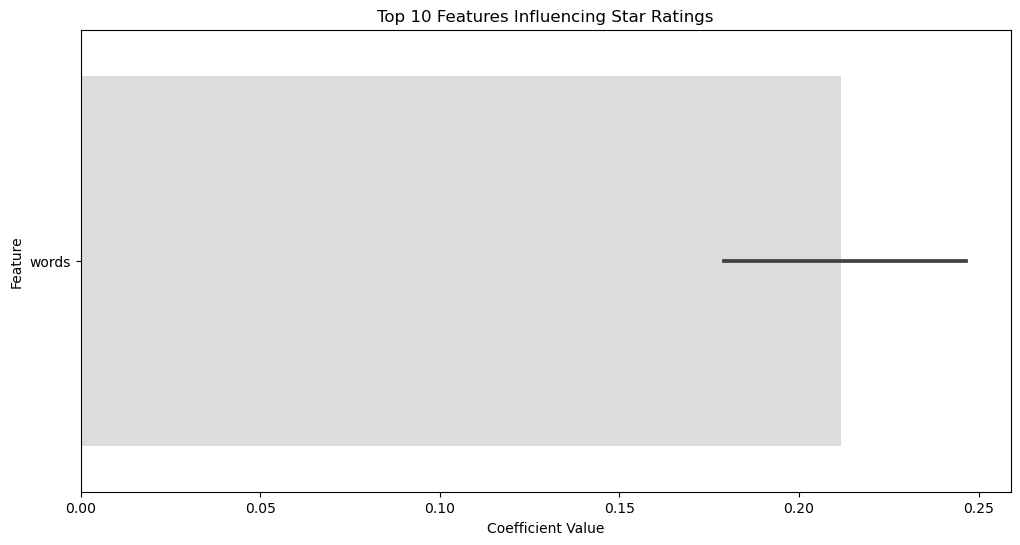

In [68]:
#Extract the model's coefficients
coefficients = model.stages[-1].coefficients.toArray()

# Extract the feature names
features = idf.getOutputCol()
feature_names = model.stages[0].getOutputCol()

# Create a Pandas DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the top 10 features by absolute coefficient value
top_features = feature_importance_df.nlargest(10, 'Coefficient')
print(top_features)

# Plot the top 10 features
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')
plt.title('Top 10 Features Influencing Star Ratings')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()



## Model Evaluation Metrics 

* This code utilizes scikit-learn to convert predictions from a Spark DataFrame to a Pandas DataFrame, calculates various evaluation metrics such as accuracy, area under the ROC curve (AUC), and classification report, providing a comprehensive assessment of the model's performance in a multi-class classification task. 

## Confusion Matrix 

* This code from scikit-learn converts predictions from a Spark DataFrame to a Pandas DataFrame, calculates the confusion matrix based on the 'stars' and 'prediction' columns, and visualizes it using a heatmap with annotations, providing an overview of model performance in classification tasks.

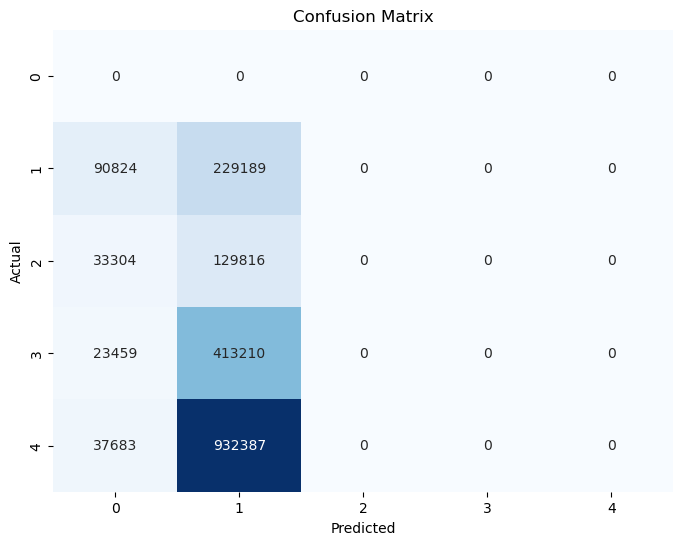

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Convert Spark DataFrame to Pandas DataFrame for confusion matrix
predictions_pd = predictions.select('stars', 'prediction').toPandas()

# Calculate the confusion matrix
c_matrix = confusion_matrix(predictions_pd['stars'], predictions_pd['prediction'])

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
